# HW 1 - Reinforcement Learning Class - Christopher Tatsch

### The goal of this hw is to find a policy for the gym cab problem using policy iteration. The taxi problem is shown in Figure 1, where the goal is to pick up the passenger from one location and drop at another. The goal is to find optimal value function and optimal policy.

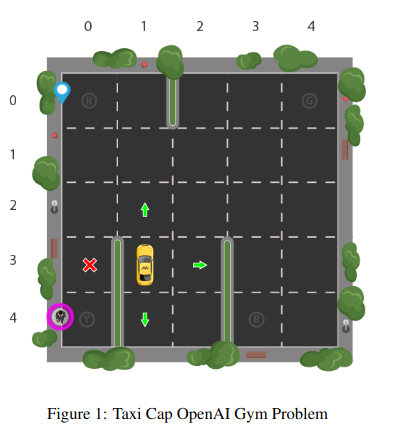

In [1]:
import gym
import numpy as np
env = gym.make("Taxi-v3")
env.render()
print("Number of observations: {}".format(env.observation_space.n))


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Number of observations: 500


In [2]:
# This algorithm is a 2 step algorithm (Policy Evaluation and Policy Improvement)

# Initialize Policy Matrix
def policy_evaluation(policy, env):
    V = np.zeros(env.nS)
    theta = 0.00001
    while True:
        delta = 0
        for s in range(env.nS):
            v = 0
            for a in range(env.nA):
                for prob, nextState, reward, done in env.P[s][a]:
                    v+=policy[s][a] * prob * (reward + 0.90*V[nextState])            
            delta = max(delta, np.abs(V[s]-v))
            V[s] = v
        if delta < theta:
            break
    return V


In [10]:

def policy_improvement(env):
    policy = np.ones([env.nS, env.nA]) / env.nA
    number_iterations = 0
    optimal = False
    while optimal == False:
        optimal_policy = True
        number_iterations += 1
        V = policy_evaluation(policy, env)
        for s in range(env.nS):
            current_action = np.argmax(policy[s])
            A = np.zeros(env.nA) # number of actions
            for a in range(env.nA):
                for prob, nextState, reward, done in env.P[s][a]:
                    A[a] += prob * (reward + 0.90*V[nextState])
            new_action = np.argmax(A)
            if current_action != new_action: #If there is a different action in the policy improvement from the current policy, the policy is not optimal yet
                optimal_policy = False
                        
            policy[s] = np.zeros([env.nA])
            policy[s][new_action] = 1
        if optimal_policy == True:
            optimal = True        
    print("Number of iterations: {}".format(number_iterations))
    return policy, V

policy, value = policy_improvement(env)

Number of iterations: 12


In [11]:
# Evaluate Policy
env.reset()
env.render()
steps = 0
while True:
    env.render()
    action = policy[env.env.s].tolist().index(1.0)
    observation, reward, done, info = env.step(action)
    steps +=1
    if done:
        print("Episode finished after {} timesteps".format(steps+1))
        break

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+-------